For paper

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from load_data import *

In [9]:
wrangler = Wrangler()
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
listings = pd.read_csv(url_listing)

# remove extreme prices
price = listings["price"]
price = price.str.replace("$","")
price = price.str.replace(",","")
price = price.astype(float)
filter = price < 500
listings = listings[filter]

X_train, y_train = wrangler.fit_listings(listings)

------------------------------
Fit listings...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
61 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra_pillows_and_blankets', 'Luggage_dropoff_allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds_rare', 'host_location_country_Ireland', 'neighbourhood_cleansed_Dn_Laoghaire-Rathdown']


In [10]:
city_life = ["nightclubs", "sex_amenities", "bicycle_rentals", "casinos", "university", "kiosks",
                 "theatres_artscentre", "library", "taxi", "fast_foods", "restaurants", "bars",
                 "cafes", "malls", "cinemas", "supermarkets", "bus_train_tram_station", "social_amenities"]
city_life_df = X_train[city_life]
pca_city = PCA().fit(city_life_df)


travel_touristic = ["neighbourhood_cleansed_Dublin_City", "in_city", "nearest_sight", "mean_dist_sight", 
                    "2nd_nearest_sight", "3rd_nearest_sight", "nearest_travel_poss", "mean_dist_travel"]
travel_touristic_df = X_train[travel_touristic]
pca_travel = PCA().fit(travel_touristic_df)


kitchen = ["Microwave", "Dishes_and_silverware", "Refridgerator_available", "Dishwasher",
           "Stoves_available", "Cooking_basics", "Oven_available", "Kitchen_available",
           "Hot_water"]
kitchen_equip_df = X_train[kitchen]
pca_kitchen = PCA().fit(kitchen_equip_df)


acco = ["room_type_Private_room", "room_type_Entire_home/apt", 
        "bath_number_1", "bath_number_2", "bath_kind_Shared", "bath_kind_Private", "bath_kind_Normal",
        "bedrooms_1", "bedrooms_2", "accommodates", "beds", 
        "property_type_Private_room_in_residential_home", "property_type_Entire_rental_unit",
        "property_type_Private_room_in_rental_unit", "property_type_Entire_residential_home"]
accommodation_size_df = X_train[acco]
pca_acco = PCA().fit(accommodation_size_df)

host_listings = ["calculated_host_listings_count", "host_listings_count", "calculated_host_listings_count_private_rooms",
                 "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_shared_rooms"]
host_listings_df = X_train[host_listings]
pca_listings = PCA().fit(host_listings_df)
r_cs = np.cumsum(pca_listings.explained_variance_ratio_)


min_nights = ["minimum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_nights_avg_ntm"]
min_nights_df = X_train[min_nights]
pca_minnights = PCA().fit(min_nights_df)


avail = ["availability_365", "availability_30", "availability_60", "availability_90"]
avail_df = X_train[avail]
pca_avail = PCA().fit(avail_df)


review_total =  ["review_scores_rating", "mean_compound", "most_pos_compound", "mean_positivity",
                 "mean_neutrality", "mean_negativity", "prop_of_neg_comp", "mean_review_length"]
review_total_df = X_train[review_total]
pca_review = PCA().fit(review_total_df)


review_scores = ["review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_cleanliness",
                 "review_scores_value"]
review_scores_df = X_train[review_scores]
pca_rescores = PCA().fit(review_scores_df)


max_nights = ["maximum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
              "maximum_nights_avg_ntm", "Long_term_stays_allowed"]
max_nights_df = X_train[max_nights]
pca_maxnights = PCA().fit(max_nights_df)


review_amount = ["number_of_reviews_l30d", "number_of_reviews_ltm", "reviews_per_month"]
review_amount_df = X_train[review_amount]
pca_rev_amount = PCA().fit(review_amount_df)

host_ab = ["compound_host_ab", "positivity_host_ab", "host_about_length", "neutrality_host_ab"]
host_ab_df = X_train[host_ab]
pca_host_ab = PCA().fit(host_ab_df)

neigh_over = ["compound_neigh_over", "positivity_neigh_over", "neighborhood_overview_length", "neutrality_neigh_over"]
neigh_over_df = X_train[neigh_over]
pca_neigh_over = PCA().fit(neigh_over_df)

descr = ["compound_descr", "positivity_descr", "description_length", "neutrality_descr"]
descr_df = X_train[descr]
pca_descr = PCA().fit(neigh_over_df)

img_no = ["no_img_others", "no_img_hallway", "no_img_dining", "no_img_bathroom", "count", 
          "no_img_bedroom", "no_img_kitchen", "no_img_living"]
img_no_df = X_train[img_no]
pca_image = PCA().fit(img_no_df)

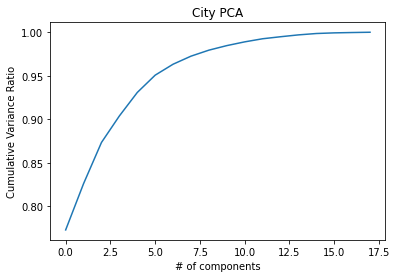

In [29]:
plt.plot(np.cumsum(pca_city.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("City PCA")
plt.savefig("pcas/city_pca.png")

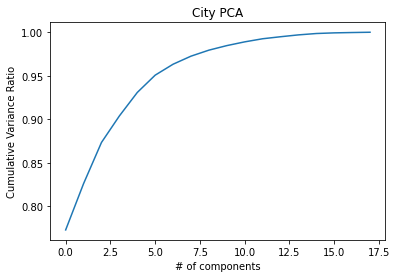

In [30]:
plt.plot(np.cumsum(pca_city.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("City PCA")
plt.savefig("pcas/city_pca.png")

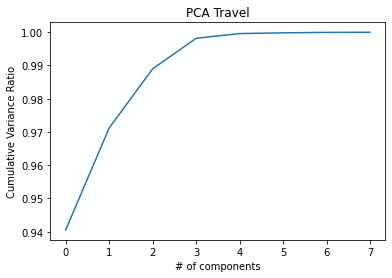

In [31]:
plt.plot(np.cumsum(pca_travel.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("PCA Travel")
plt.savefig("pcas/travel_pca.png")

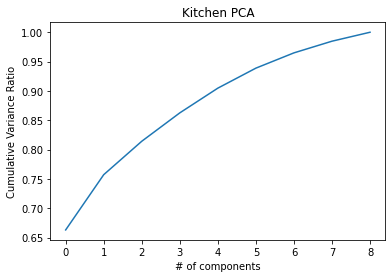

In [32]:
plt.plot(np.cumsum(pca_kitchen.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Kitchen PCA")
plt.savefig("pcas/kitchen_pca.png")

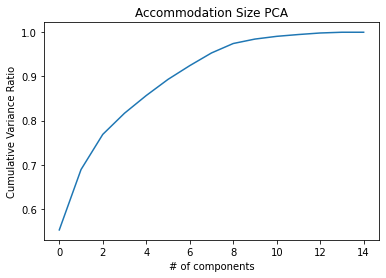

In [33]:
plt.plot(np.cumsum(pca_acco.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Accommodation Size PCA")
plt.savefig("pcas/accommodation_size_pca.png")

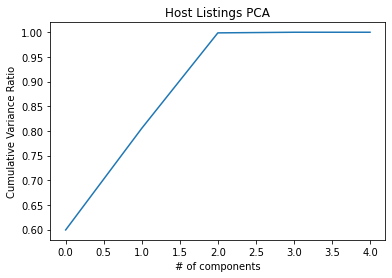

In [34]:
plt.plot(r_cs)
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Host Listings PCA")
plt.savefig("pcas/host_listings_pca.png")

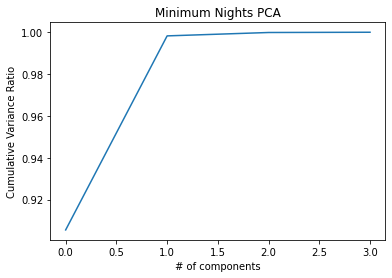

In [35]:
plt.plot(np.cumsum(pca_minnights.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Minimum Nights PCA")
plt.savefig("pcas/min_nights_pca.png")

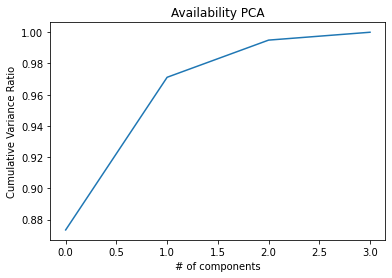

In [36]:
plt.plot(np.cumsum(pca_avail.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Availability PCA")
plt.savefig("pcas/avail_pca.png")

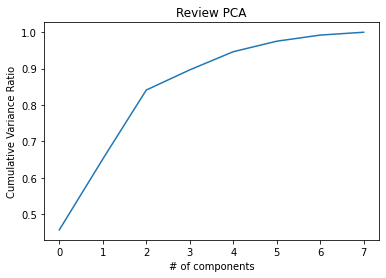

In [37]:
plt.plot(np.cumsum(pca_review.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Review PCA")
plt.savefig("pcas/review_pca.png")

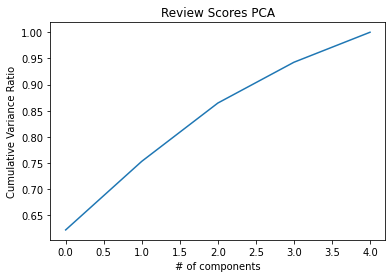

In [38]:
plt.plot(np.cumsum(pca_rescores.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Review Scores PCA")
plt.savefig("pcas/review_scores_pca.png")

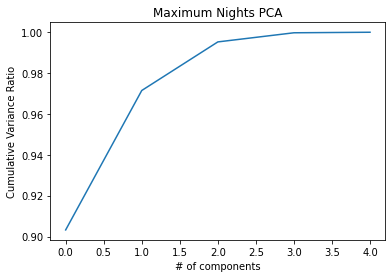

In [39]:
plt.plot(np.cumsum(pca_maxnights.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Maximum Nights PCA")
plt.savefig("pcas/max_nights_pca.png")

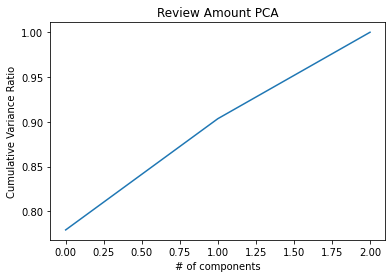

In [40]:
plt.plot(np.cumsum(pca_rev_amount.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Review Amount PCA")
plt.savefig("pcas/review_amount_pca")

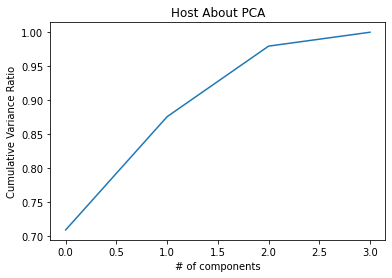

In [41]:
plt.plot(np.cumsum(pca_host_ab.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Host About PCA")
plt.savefig("pcas/host_ab_pca.png")

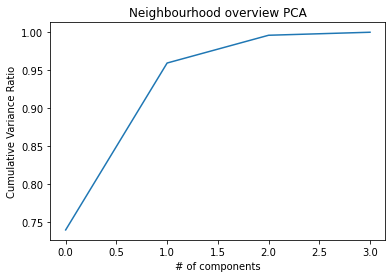

In [42]:
plt.plot(np.cumsum(pca_neigh_over.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Neighbourhood overview PCA")
plt.savefig("pcas/neigh_over_pca.png")

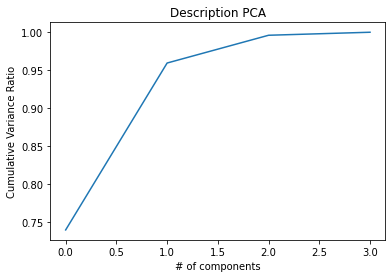

In [43]:
plt.plot(np.cumsum(pca_descr.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Description PCA")
plt.savefig("pcas/descr_pca.png")

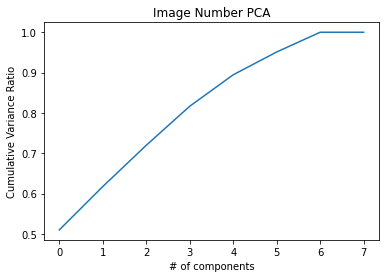

In [44]:
plt.plot(np.cumsum(pca_image.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Image Number PCA")
plt.savefig("pcas/image_pca.png")

In [45]:
import os

In [46]:
os.getcwd()

'd:\\Uni\\WiSe21-22\\Statistical and Deep Learning\\DubAir\\DubAir'